In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('https://projects.fivethirtyeight.com/mlb-api/mlb_elo.csv')

In [3]:
df.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
0,2020-10-27,2020,1,w,LAD,TBD,1607.757915,1564.177984,0.582851,0.417149,...,54.055790,54.534448,7.995742,6.040024,0.594547,0.405453,1612.374351,1561.153482,3,1
1,2020-10-25,2020,1,w,TBD,LAD,1566.449752,1605.486147,0.425652,0.574348,...,52.966933,57.214954,-1.826734,23.114096,0.368716,0.631284,1562.804875,1610.722958,2,4
2,2020-10-24,2020,1,w,TBD,LAD,1563.862158,1608.073741,0.415971,0.584029,...,52.636552,50.974099,-3.959517,-6.204884,0.411161,0.588839,1564.204361,1609.323472,8,7
3,2020-10-23,2020,1,w,TBD,LAD,1567.099442,1604.836456,0.428091,0.571909,...,57.971157,55.937980,20.546588,18.098422,0.420376,0.579624,1562.243577,1611.284256,2,6
4,2020-10-21,2020,1,w,LAD,TBD,1608.352409,1563.583490,0.585068,0.414932,...,54.975487,54.421564,13.013222,4.009710,0.611092,0.388908,1608.914363,1564.613470,4,6


In [4]:
df = df[(df['date'] >= '2000-02-29') & (df['date'] <= '2019-9-29')]
df = df.sort_values(by='date')

In [5]:
df = df[(df['playoff'] != 'w') &
                  (df['playoff'] != 'l') &
                 (df['playoff'] != 'd') &
                 (df['playoff'] != 'c')]

In [33]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [34]:
df['Y'] = (df.date).apply(lambda x: x.year)
df['M'] = (df.date).apply(lambda x: x.month)
df['D'] = (df.date).apply(lambda x: x.day)

In [8]:
df.shape

(48588, 29)

In [9]:
df['home_win'] = np.where(df['score1'] > df['score2'], 1, 0)

In [10]:
df = df[['date', 'season', 'team1', 'team2', 'home_win', 'score1', 'score2']]

df = df.rename({'season':'Y',
                'team1': 'home_team',
                'team2': 'away_team',
                'score1': 'home_score',
                'score2': 'away_score'},
              axis=1)

df = df.reset_index(drop=True)

In [11]:
df.head()

,date,Y,home_team,away_team,home_win,home_score,away_score
0,2000-03-29,2000,NYM,CHC,0,3,5
1,2000-03-30,2000,CHC,NYM,0,1,5
2,2000-04-03,2000,ATL,COL,1,2,0
3,2000-04-03,2000,ANA,NYY,0,2,3
4,2000-04-03,2000,WSN,LAD,0,4,10


In [12]:
def uniform_name(df, col_name):
    df[col_name] = df[col_name].str.replace(r'\W', '')
    df[col_name] = df[col_name].str.lower()
    
    team_list = ['TOR', 'SFN', 'SEA', 'NYA', 'LAN', 'BAL', 'COL', 'CHN', 'MIA',
       'CLE', 'CIN', 'TEX', 'TBA', 'DET', 'ATL', 'HOU', 'MIL', 'WAS',
       'PHI', 'OAK', 'ARI', 'CHA', 'BOS', 'KCA', 'SLN', 'PIT', 'NYN',
       'MIN', 'SDN', 'ANA']
    
    
    
    team_dict = {'jays':'TOR','bluejays':'TOR', 'torontobluejays':'TOR', 'tor':'TOR', 
                 'giants':'SFN', 'sfg': 'SFN', 'sanfranciscogiants':'SFN', 'sf':'SFN', 'sfn':'SFN', 
                 'mariners':'SEA', 'seattlemariners':'SEA', 'sea':'SEA', 
                 'yankees':'NYA', 'nyy': 'NYA', 'newyorkyankees':'NYA', 'nya':'NYA', 
                 'dodgers':'LAN', 'lad':'LAN', 'losangelesdodgers':'LAN', 'la':'LAN', 'lan':'LAN', 
                 'orioles':'BAL', 'baltimoreorioles':'BAL', 'bal':'BAL', 
                 'rockies':'COL', 'coloradorockies':'COL', 'col':'COL', 
                 'cubs':'CHN', 'chc':'CHN', 'chicagocubs':'CHN', 'chn':'CHN', 
                 'marlins':'MIA', 'fla':'MIA', 'floridamarlins':'MIA', 'miamimarlins':'MIA', 'mia':'MIA', 
                 'indians':'CLE', 'clevelandindians':'CLE', 'cle':'CLE', 
                 'reds':'CIN', 'cincinnatireds':'CIN', 'cin':'CIN', 
                 'rangers':'TEX', 'texasrangers':'TEX', 'tex':'TEX', 
                 'rays':'TBA', 'devilrays':'TBA', 'tbd':'TBA', 'tampabayrays':'TBA', 'tampabaydevilrays':'TBA', 'tba':'TBA', 
                 'tigers':'DET', 'detriottigers':'DET', 'det':'DET', 
                 'braves':'ATL', 'atlantabraves':'ATL', 'atl':'ATL', 
                 'astros':'HOU', 'houstonastros':'HOU', 'hou':'HOU', 
                 'brewers':'MIL', 'milwaukeebrewers':'MIL', 'mil':'MIL', 
                 'nationals':'WAS', 'wsh':' WAS', 'wsn':'WAS', 'washingtonnationals':'WAS', 'montrealexpos':'WAS', 'expos':'WAS', 'mtl':'WAS','was':'WAS', 
                 'phillies':'PHI', 'philadelphiaphillies':'PHI', 'phi':'PHI', 
                 'as':'OAK', 'athletics':'OAK', 'oaklandathletics':'OAK', 'oaklandas':'OAK', 'oaklanda':'OAK', 'oak':'OAK', 
                 'diamondbacks':'ARI', 'arizonadiamondbacks':'ARI', 'ari':'ARI', 
                 'whitesox':'CHA', 'cws':'CHA', 'chicagowhitesox':'CHA', 'cha':'CHA', 'chw':'CHA',
                 'redsox':'BOS', 'bostonredsox':'BOS', 'bos':'BOS', 
                 'royals':'KCA', 'kcr':'KCA', 'kansascityroyals':'KCA', 'kc':'KCA', 'kca':'KCA', 
                 'cardinals':'SLN', 'slc':'SLN', 'stl':'SLN', 'saintlouiscardinals':'SLN', 'stlouiscardinals':'SLN', 'sln':'SLN', 
                 'pirates':'PIT', 'pittsburghpirates':'PIT', 'pit':'PIT', 
                 'mets':'NYN', 'nym':'NYN', 'newyorkmets':'NYN', 'nyn':'NYN', 
                 'twins':'MIN', 'minnesotatwins':'MIN', 'min':'MIN', 
                 'padres':'SDN', 'sdp':'SDN', 'sandiegopadres':'SDN', 'sd':'SDN', 'sdn':'SDN', 
                 'angels':'ANA', 'laa':'ANA', 'losangelesangels':'ANA', 'losangelesangelsofanaheim':'ANA', 'ana':'ANA', }
    
    df[col_name] = df[col_name].map(team_dict)
    
    return df

In [13]:
df = uniform_name(df, 'home_team')
df = uniform_name(df, 'away_team')

In [13]:
team_list = ['TOR', 'SFN', 'SEA', 'NYA', 'LAN', 'BAL', 'COL', 'CHN', 'MIA',
       'CLE', 'CIN', 'TEX', 'TBA', 'DET', 'ATL', 'HOU', 'MIL', 'WAS',
       'PHI', 'OAK', 'ARI', 'CHA', 'BOS', 'KCA', 'SLN', 'PIT', 'NYN',
       'MIN', 'SDN', 'ANA']

In [15]:
df['home_total_R'] = 0
df['home_total_RA'] = 0
df['away_total_R'] = 0
df['away_total_RA'] = 0

In [17]:
df

,date,Y,home_team,away_team,home_win,home_score,away_score,home_total_R,home_total_RA,away_total_R,away_total_RA
0,2000-03-29,2000,NYN,CHN,0,3,5,0,0,0,0
1,2000-03-30,2000,CHN,NYN,0,1,5,0,0,0,0
2,2000-04-03,2000,ATL,COL,1,2,0,0,0,0,0
3,2000-04-03,2000,ANA,NYA,0,2,3,0,0,0,0
4,2000-04-03,2000,WAS,LAN,0,4,10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
48583,2019-09-29,2019,TEX,NYA,1,6,1,0,0,0,0
48584,2019-09-29,2019,SFN,LAN,0,0,9,0,0,0,0
48585,2019-09-29,2019,PHI,MIA,0,3,4,0,0,0,0
48586,2019-09-29,2019,BOS,BAL,1,5,4,0,0,0,0


This function below will total the runs allowed and runs scored for the home and away teams throughout the season so far. This does not include the game being played.

In [18]:
pd.set_option('mode.chained_assignment', None)
c = 0
home_R = 0
home_RA = 0
away_R = 0
away_RA = 0
for i in range(df.shape[0]):
    if (i % 4000 == 0):
        print(i)
    for team in team_list:
        if (df.iloc[i][2] == team) | (df.iloc[i][3] == team):
            home_team_df = df[df['home_team'] == team]
            home_team_df = home_team_df[home_team_df['Y'] == (df.iloc[i][1])]
            home_team_df = home_team_df[home_team_df['date'] < df.iloc[i][0]]
            away_team_df = df[df['away_team'] == team]
            away_team_df = away_team_df[away_team_df['Y'] == (df.iloc[i][1])]
            away_team_df = away_team_df[away_team_df['date'] < df.iloc[i][0]]
            
            if df.iloc[i][2] == team:
                df['home_total_R'][i] = home_team_df['home_score'].sum() + away_team_df['away_score'].sum()
                df['home_total_RA'][i] = home_team_df['away_score'].sum() + away_team_df['home_score'].sum()
            if df.iloc[i][3] == team:
                df['away_total_R'][i] = away_team_df['away_score'].sum() + home_team_df['home_score'].sum()
                df['away_total_RA'][i] = away_team_df['home_score'].sum() + home_team_df['away_score'].sum()
            
        #if df.iloc[i][3] == team:
         ##   away_team_df = df[df['away_team'] == team]
         #   away_team_df = away_team_df[away_team_df['Y'] == (df.iloc[i][1])]
         #   away_team_df = away_team_df[away_team_df['date'] < df.iloc[i][0]]
            
    
    
    c+=1

0
4000
8000
12000
16000
20000
24000
28000
32000
36000
40000
44000
48000


In [29]:
df.head()

,date,Y,home_team,away_team,home_win,home_score,away_score,home_total_R,home_total_RA,away_total_R,away_total_RA
0,2000-03-29,2000,NYN,CHN,0,3,5,0,0,0,0
1,2000-03-30,2000,CHN,NYN,0,1,5,5,3,3,5
2,2000-04-03,2000,ATL,COL,1,2,0,0,0,0,0
3,2000-04-03,2000,ANA,NYA,0,2,3,0,0,0,0
4,2000-04-03,2000,WAS,LAN,0,4,10,0,0,0,0


In [14]:
df.head()

,date,Y,home_team,away_team,home_win,home_score,away_score,home_total_R,home_total_RA,away_total_R,away_total_RA
0,2000-03-29,2000,NYN,CHN,0,3,5,0,0,0,0
1,2000-03-30,2000,CHN,NYN,0,1,5,5,3,3,5
2,2000-04-03,2000,ATL,COL,1,2,0,0,0,0,0
3,2000-04-03,2000,ANA,NYA,0,2,3,0,0,0,0
4,2000-04-03,2000,WAS,LAN,0,4,10,0,0,0,0


In [17]:
df['home_win_pct'] = float(0)
df['away_win_pct'] = float(0)

This function now will calculate the winning percentage so far not including the game being played.

In [24]:
pd.set_option('mode.chained_assignment', None)
c = 0
home_win = 0
home_games = 0
away_win = 0
away_games = 0
for i in range(df.shape[0]):
    if (i % 4000 == 0):
        print(i)
    for team in team_list:
        if (df.iloc[i][2] == team) | (df.iloc[i][3] == team):
            home_team_df = df[df['home_team'] == team]
            home_team_df = home_team_df[home_team_df['Y'] == (df.iloc[i][1])]
            home_team_df = home_team_df[home_team_df['date'] < df.iloc[i][0]]
            away_team_df = df[df['away_team'] == team]
            away_team_df = away_team_df[away_team_df['Y'] == (df.iloc[i][1])]
            away_team_df = away_team_df[away_team_df['date'] < df.iloc[i][0]]
            home_win_df = home_team_df[home_team_df['home_win'] == 1]
            away_win_df = away_team_df[away_team_df['home_win'] == 0]
            
            if (home_team_df.shape[0] + away_team_df.shape[0]) != 0:
                if df.iloc[i][2] == team:
                    df['home_win_pct'][i] = (home_win_df.shape[0]+away_win_df.shape[0]) / (home_team_df.shape[0] + away_team_df.shape[0])
                if df.iloc[i][3] == team:
                    df['away_win_pct'][i] = (away_win_df.shape[0]+home_win_df.shape[0]) / (home_team_df.shape[0] + away_team_df.shape[0])
            
            
    
    
    c+=1

0
4000
8000
12000
16000
20000
24000
28000
32000
36000
40000
44000
48000


In [26]:
df.tail()

,date,Y,home_team,away_team,home_win,home_score,away_score,home_total_R,home_total_RA,away_total_R,away_total_RA,home_win_pct,away_win_pct
48583,2019-09-29,2019,TEX,NYA,1,6,1,804,877,942,733,0.478261,0.639752
48584,2019-09-29,2019,SFN,LAN,0,0,9,678,764,877,613,0.478261,0.652174
48585,2019-09-29,2019,PHI,MIA,0,3,4,771,790,611,805,0.503106,0.347826
48586,2019-09-29,2019,BOS,BAL,1,5,4,896,824,725,976,0.515528,0.335404
48587,2019-09-29,2019,TOR,TBA,1,8,3,718,825,766,648,0.409938,0.596273


Calculating Pythagorean Expectation

In [4]:
df['home_pythag_expect'] = (df['home_total_R']**(1.83)/(df['home_total_R']**(1.83)+df['home_total_RA']**(1.83)))
df['away_pythag_expect'] = (df['away_total_R']**(1.83)/(df['away_total_R']**(1.83)+df['away_total_RA']**(1.83)))

In [9]:
df.head()

,date,Y,home_team,away_team,home_win,home_score,away_score,home_total_R,home_total_RA,away_total_R,away_total_RA,home_win_pct,away_win_pct,home_pythag_expect,away_pythag_expect
0,2000-03-29,2000,NYN,CHN,0,3,5,0,0,0,0,0.0,0.0,0.00000,0.00000
1,2000-03-30,2000,CHN,NYN,0,1,5,5,3,3,5,1.0,0.0,0.71805,0.28195
2,2000-04-03,2000,ATL,COL,1,2,0,0,0,0,0,0.0,0.0,0.00000,0.00000
3,2000-04-03,2000,ANA,NYA,0,2,3,0,0,0,0,0.0,0.0,0.00000,0.00000
4,2000-04-03,2000,WAS,LAN,0,4,10,0,0,0,0,0.0,0.0,0.00000,0.00000


In [7]:
df = df.fillna(0)

In [10]:
df['home_win_diff'] = df['home_pythag_expect'] - df['home_win_pct']
df['away_win_diff'] = df['away_pythag_expect'] - df['away_win_pct']

In [11]:
df.head()

,date,Y,home_team,away_team,home_win,home_score,away_score,home_total_R,home_total_RA,away_total_R,away_total_RA,home_win_pct,away_win_pct,home_pythag_expect,away_pythag_expect,home_win_diff,away_win_diff
0,2000-03-29,2000,NYN,CHN,0,3,5,0,0,0,0,0.0,0.0,0.00000,0.00000,0.00000,0.00000
1,2000-03-30,2000,CHN,NYN,0,1,5,5,3,3,5,1.0,0.0,0.71805,0.28195,-0.28195,0.28195
2,2000-04-03,2000,ATL,COL,1,2,0,0,0,0,0,0.0,0.0,0.00000,0.00000,0.00000,0.00000
3,2000-04-03,2000,ANA,NYA,0,2,3,0,0,0,0,0.0,0.0,0.00000,0.00000,0.00000,0.00000
4,2000-04-03,2000,WAS,LAN,0,4,10,0,0,0,0,0.0,0.0,0.00000,0.00000,0.00000,0.00000


In [8]:
train = df[df['Y'] <= 2015]
test = df[df['Y'] > 2015]

In [9]:
y_test = test.home_win

Testing out the pythagorean expectation, doesn't work too well

In [28]:
monthly_acc = []
months_list = np.sort(test['M'].unique())
for months in months_list:
    predictions = []
    test_month = test[test['M'] == months]
    y_test_month = test_month.home_win
    for i in range(test_month.shape[0]):
        if test_month.iloc[i]['home_win_diff'] > test_month.iloc[i]['away_win_diff']:
            predictions.append(1)
        elif test_month.iloc[i]['away_win_diff'] > test_month.iloc[i]['home_win_diff']:
            predictions.append(0)
        else:
            predictions.append(1)
    monthly_acc.append(accuracy_score(y_test_month, predictions))

In [29]:
monthly_acc

[0.5434782608695652,
 0.5097511768661735,
 0.503584229390681,
 0.508641975308642,
 0.5053475935828877,
 0.4949374627754616,
 0.5126309303758472,
 0.6382978723404256]

In [26]:
predictions[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [27]:
accuracy_score(y_test, predictions)

0.5066886190574192

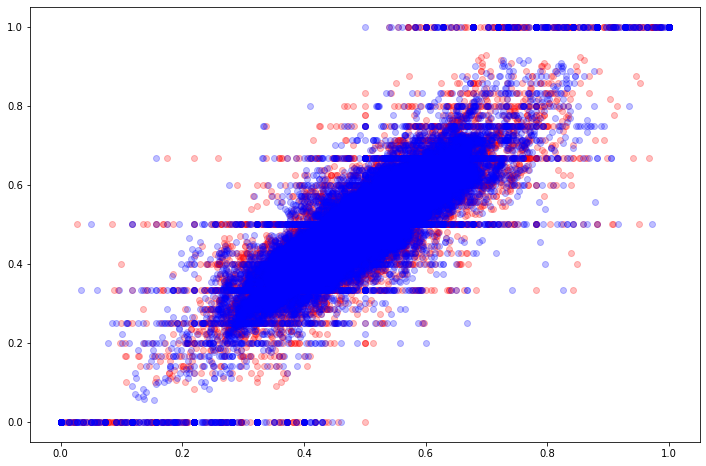

In [30]:
plt.figure(figsize=(12,8))
plt.scatter(df['home_pythag_expect'], df['home_win_pct'], color='red', alpha=0.25)
plt.scatter(df['away_pythag_expect'], df['away_win_pct'], color='blue', alpha=0.25)

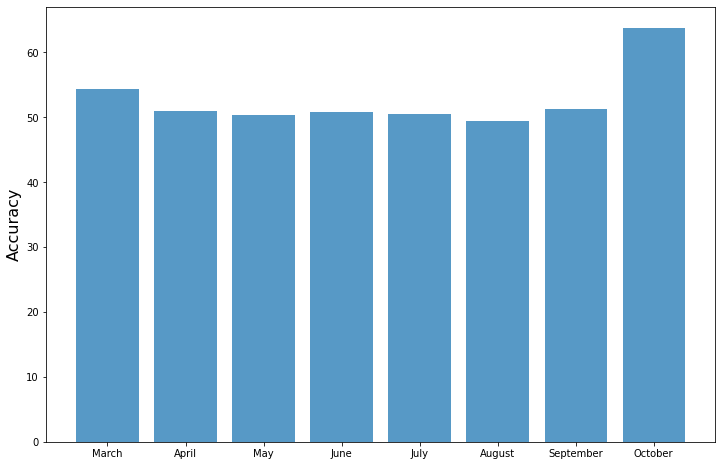

In [42]:
monthly_acc = pd.DataFrame(monthly_acc)
plt.figure(figsize=(12,8))
plt.bar(monthly_acc.index, monthly_acc[0]*100, alpha=0.75)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks([0,1,2,3,4,5,6,7], ['March','April', 'May', 'June','July', 'August', 'September', 'October']);

In [45]:
df.to_csv('data_w_pe.csv')

In [2]:
df = pd.read_csv('data_w_pe.csv')
df = df.drop('Unnamed: 0', axis=1)

In [6]:
team_wl = pd.read_csv('team_wl2.csv')[['Year', 'Team', 'W-L-pct']]

In [24]:
team_wl.head()

,Year,Team,W-L-pct
0,2000,LAN,0.530864
1,2001,LAN,0.530864
2,2002,LAN,0.567901
3,2003,LAN,0.524691
4,2004,LAN,0.574074


In [25]:
df = df[df['Y'] > 2000]

In [26]:
df['home_previous_WL'] = float(0)
df['away_previous_WL'] = float(0)

In [7]:
team_wl.shape

(600, 3)

In [27]:
df = df.reset_index(drop=True)

This gives the previous years W-L percentage for home and away teams

In [34]:
pd.set_option('mode.chained_assignment', None)
c = 0
for i in range(df.shape[0]):
    if (i % 4000 == 0):
        print(i)
    for team in team_list:
        if (df.iloc[i][2] == team):
            home_team_df = team_wl[team_wl['Team'] == team]
            home_team_df = home_team_df[home_team_df['Year'] == (df.iloc[i][1]-1)]
            
            df['home_previous_WL'][i] = home_team_df.iloc[0]['W-L-pct']
           
        
        if (df.iloc[i][3] == team):
            away_team_df = team_wl[team_wl['Team'] == team]
            away_team_df = away_team_df[away_team_df['Year'] == (df.iloc[i][1]-1)]
            
            df['away_previous_WL'][i] = away_team_df.iloc[0]['W-L-pct']
            
    
    
    c+=1

0
4000
8000
12000
16000
20000
24000
28000
32000
36000
40000
44000


In [28]:
away_team_df = team_wl[team_wl['Team'] == 'LAN']
away_team_df = away_team_df[away_team_df['Year'] == (2000)]

In [29]:
df['away_previous_WL'][0] = away_team_df.iloc[0]['W-L-pct']

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df = pd.read_csv('date_w_pe.csv')
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.head()

,date,Y,home_team,away_team,home_win,home_score,away_score,home_total_R,home_total_RA,away_total_R,...,home_win_pct,away_win_pct,home_pythag_expect,away_pythag_expect,home_win_diff,away_win_diff,M,D,home_previous_WL,away_previous_WL
0,2001-04-01,2001,TOR,TEX,1,8,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,1,0.512346,0.438272
1,2001-04-02,2001,SFN,SDN,1,3,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,2,0.598765,0.469136
2,2001-04-02,2001,SEA,OAK,1,5,4,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,2,0.561728,0.565217
3,2001-04-02,2001,NYA,KCA,1,7,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,2,0.540373,0.475309
4,2001-04-02,2001,LAN,MIL,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,4,2,0.530864,0.450617


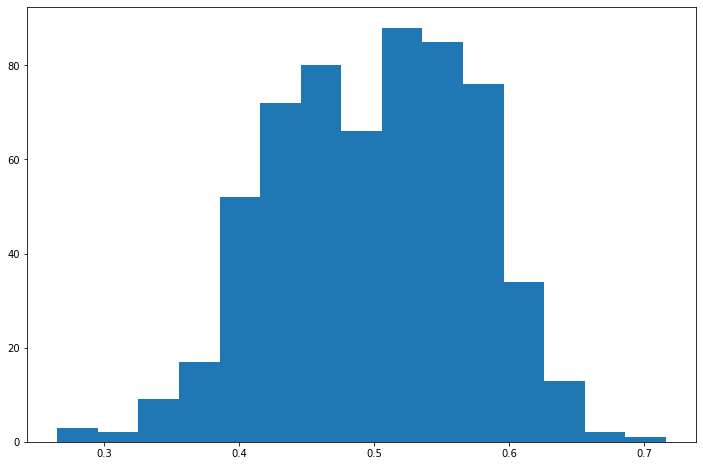

In [8]:
plt.figure(figsize=(12,8))
plt.hist(team_wl['W-L-pct'], bins=15);

In [9]:
team_wl['W-L-pct'].describe()

count    600.000000
mean       0.499990
std        0.072715
min        0.265432
25%        0.444444
50%        0.501553
75%        0.555556
max        0.716049
Name: W-L-pct, dtype: float64

In [10]:
mean = team_wl['W-L-pct'].mean()

In [11]:
var = team_wl['W-L-pct'].std()**2

In [12]:
df['home_bayes_win'] = float(0)
df['away_bayes_win'] = float(0)

Now we can calculate their winning percentage so far using bayesian stats. This is meant to make the W-L Percentage more realistic.

In [14]:
pd.set_option('mode.chained_assignment', None)
c = 0
for i in range(df.shape[0]):
    if (i % 4000 == 0):
        print(i)
    for team in team_list:
        if (df.iloc[i][2] == team) | (df.iloc[i][3] == team):
            home_team_df = df[df['home_team'] == team]
            home_team_df = home_team_df[home_team_df['Y'] == (df.iloc[i][1])]
            home_team_df = home_team_df[home_team_df['date'] < df.iloc[i][0]]
            away_team_df = df[df['away_team'] == team]
            away_team_df = away_team_df[away_team_df['Y'] == (df.iloc[i][1])]
            away_team_df = away_team_df[away_team_df['date'] < df.iloc[i][0]]
            home_win_df = home_team_df[home_team_df['home_win'] == 1]
            away_win_df = away_team_df[away_team_df['home_win'] == 0]
            
            if df.iloc[i][2] == team:
                df['home_bayes_win'][i] = ((home_win_df.shape[0]+away_win_df.shape[0])+var) / ((home_team_df.shape[0] + away_team_df.shape[0])+var+mean)
            if df.iloc[i][3] == team:
                df['away_bayes_win'][i] = ((away_win_df.shape[0]+home_win_df.shape[0])+var) / ((home_team_df.shape[0] + away_team_df.shape[0])+var+mean)
            
            
    
    
    c+=1

0
4000
8000
12000
16000
20000
24000
28000
32000
36000
40000
44000


In [17]:
df['home_win_diff_bayes'] = df['home_pythag_expect'] - df['home_bayes_win']
df['away_win_diff_bayes'] = df['away_pythag_expect'] - df['away_bayes_win']

Again doesn't work great all by itself.

In [25]:
monthly_acc = []
months_list = np.sort(test['M'].unique())
for months in months_list:
    predictions = []
    test_month = test[test['M'] == months]
    y_test_month = test_month.home_win
    for i in range(test_month.shape[0]):
        if test_month.iloc[i]['home_win_diff_bayes'] > test_month.iloc[i]['away_win_diff_bayes']:
            predictions.append(1)
        elif test_month.iloc[i]['away_win_diff_bayes'] > test_month.iloc[i]['home_win_diff_bayes']:
            predictions.append(0)
        else:
            predictions.append(1)
    monthly_acc.append(accuracy_score(y_test_month, predictions))

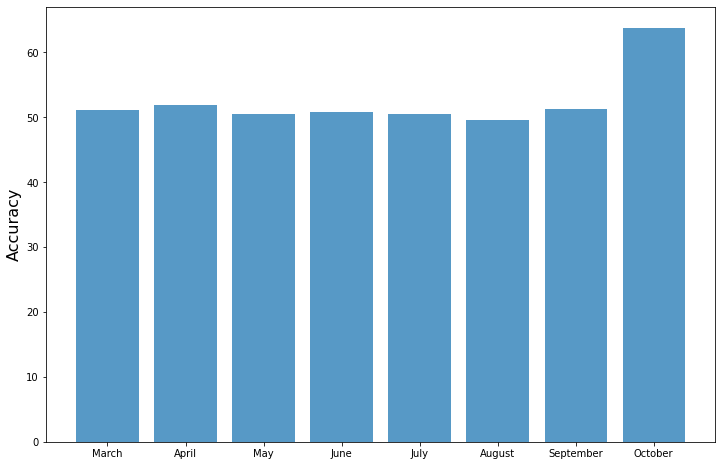

In [26]:
monthly_acc = pd.DataFrame(monthly_acc)
plt.figure(figsize=(12,8))
plt.bar(monthly_acc.index, monthly_acc[0]*100, alpha=0.75)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks([0,1,2,3,4,5,6,7], ['March','April', 'May', 'June','July', 'August', 'September', 'October']);

In [27]:
monthly_acc

,0
0,0.510870
1,0.519166
2,0.504779
3,0.508642
4,0.504679
5,0.495533
6,0.512631
7,0.638298


In [30]:
#df.to_csv('data_bayes.csv')

In [118]:
df = pd.read_csv('data_bayes.csv')
df = df.drop('Unnamed: 0', axis=1)

In [76]:
#df['x'] = df['home_win_pct'] - df['away_win_diff_pct']

In [119]:
df = df[df['M'] > 8]
df = df[df['D'] > 25]

In [107]:
df = df[df['home_win_diff'] <= 0]

In [120]:
train = df[df['Y'] <= 2015]
test = df[df['Y'] > 2015]

In [121]:
monthly_acc = []
months_list = np.sort(test['M'].unique())
for months in months_list:
    predictions = []
    test_month = test[test['M'] == months]
    y_test_month = test_month.home_win
    for i in range(test_month.shape[0]):
        if test_month.iloc[i]['home_win_diff'] > test_month.iloc[i]['away_win_diff']:
            predictions.append(1)
        elif test_month.iloc[i]['away_win_diff'] > test_month.iloc[i]['home_win_diff']:
            predictions.append(0)
        else:
            predictions.append(1)
    monthly_acc.append(accuracy_score(y_test_month, predictions))

In [122]:
monthly_acc

[0.5229007633587787]

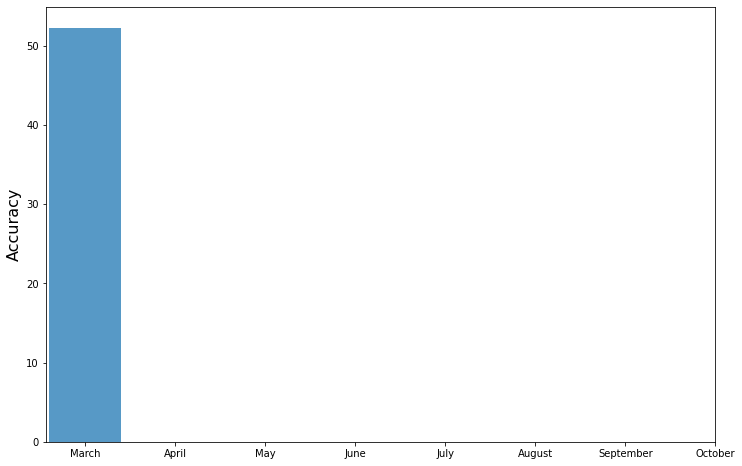

In [123]:
monthly_acc = pd.DataFrame(monthly_acc)
plt.figure(figsize=(12,8))
plt.bar(monthly_acc.index, monthly_acc[0]*100, alpha=0.75)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks([0,1,2,3,4,5,6,7], ['March','April', 'May', 'June','July', 'August', 'September', 'October']);

In [93]:
monthly_acc.mean()

0    0.527001
dtype: float64

In [126]:
df[df['M'] == 3]

,date,Y,home_team,away_team,home_win,home_score,away_score,home_total_R,home_total_RA,away_total_R,...,home_win_diff,away_win_diff,M,D,home_previous_WL,away_previous_WL,home_bayes_win,away_bayes_win,home_win_diff_bayes,away_win_diff_bayes
2429,2002-03-31,2002,ANA,CLE,0,0,6,0,0,0,...,0.000000,0.000000,3,31,0.462963,0.561728,0.010464,0.010464,-0.010464,-0.010464
4855,2003-03-30,2003,ANA,TEX,0,3,6,0,0,0,...,0.000000,0.000000,3,30,0.611111,0.444444,0.010464,0.010464,-0.010464,-0.010464
4856,2003-03-31,2003,TOR,NYA,0,4,8,0,0,0,...,0.000000,0.000000,3,31,0.481481,0.639752,0.010464,0.010464,-0.010464,-0.010464
4857,2003-03-31,2003,TBA,BOS,1,6,4,0,0,0,...,0.000000,0.000000,3,31,0.341615,0.574074,0.010464,0.010464,-0.010464,-0.010464
4858,2003-03-31,2003,SLN,MIL,1,11,9,0,0,0,...,0.000000,0.000000,3,31,0.598765,0.345679,0.010464,0.010464,-0.010464,-0.010464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43779,2019-03-31,2019,CIN,PIT,0,0,5,5,3,3,...,-0.281950,0.281950,3,31,0.413580,0.509317,0.667842,0.003513,0.050208,0.278437
43780,2019-03-31,2019,MIN,CLE,1,9,3,3,2,2,...,0.177433,-0.177433,3,31,0.481481,0.561728,0.401268,0.401268,0.276165,-0.078701
43781,2019-03-31,2019,TBA,HOU,1,3,1,8,8,8,...,-0.166667,0.166667,3,31,0.555556,0.635802,0.572077,0.286793,-0.072077,0.213207
43782,2019-03-31,2019,WAS,NYN,1,6,5,8,13,13,...,0.291424,-0.291424,3,31,0.506173,0.475309,0.002111,0.800425,0.289313,-0.091849


In [17]:
monthly_acc = []
months_list = np.sort(test['M'].unique())
for months in months_list:
    predictions = []
    test_month = test[test['M'] == months]
    y_test_month = test_month.home_win
    for i in range(test_month.shape[0]):
        if test_month.iloc[i]['log_5'] >= .5:
            predictions.append(1)
        elif test_month.iloc[i]['log_5'] < .5:
            predictions.append(0)
        else:
            predictions.append(1)
    monthly_acc.append(accuracy_score(y_test_month, predictions))

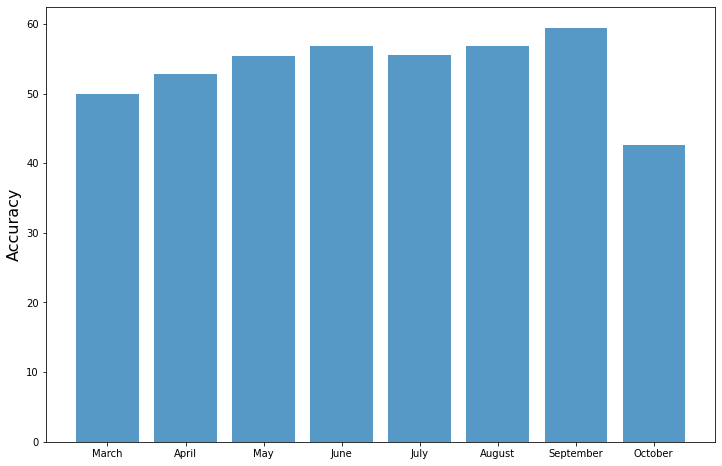

In [18]:
monthly_acc = pd.DataFrame(monthly_acc)
plt.figure(figsize=(12,8))
plt.bar(monthly_acc.index, monthly_acc[0]*100, alpha=0.75)
plt.ylabel('Accuracy', fontsize=16)
plt.xticks([0,1,2,3,4,5,6,7], ['March','April', 'May', 'June','July', 'August', 'September', 'October']);

In [11]:
monthly_acc.mean()

0    0.536754
dtype: float64

Creation of log_5

In [12]:
numerator = (df['home_win_pct'] - (df['home_win_pct']*df['away_win_pct']))
denominator = (df['home_win_pct'] + df['away_win_pct'] - (2*df['home_win_pct']*df['away_win_pct']))
df['log_5'] = numerator / denominator